# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [3]:
df=pd.read_csv('CCPP.csv')

In [4]:
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# Define x & y

In [5]:
x=df.drop(['PE'],axis=1).values
y=df['PE'].values

In [6]:
x

array([[   8.34,   40.77, 1010.84,   90.01],
       [  23.64,   58.49, 1011.4 ,   74.2 ],
       [  29.74,   56.9 , 1007.15,   41.91],
       ...,
       [  15.99,   43.34, 1014.2 ,   78.66],
       [  17.65,   59.87, 1018.58,   94.65],
       [  23.68,   51.3 , 1011.86,   71.24]])

In [7]:
y

array([480.48, 445.75, 438.76, ..., 465.96, 450.93, 451.67])

# Split the dataset in training set and test set

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)

### optional

In [21]:
print("X train:", x_train.shape)
print("X test:",  x_test.shape)
print("Y train:", y_train.shape)
print("Y test:", y_test.shape)

X train: (5740, 4)
X test: (3828, 4)
Y train: (5740,)
Y test: (3828,)


### optional

In [22]:
print("X train:", x_train.size)
print("X test:",  x_test.size)
print("Y train:", y_train.size)
print("Y test:", y_test.size)

X train: 22960
X test: 15312
Y train: 5740
Y test: 3828


# Train the model on the training set

In [23]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

# Predict the test set result

In [24]:
y_pred=ml.predict(x_test)
y_pred

array([433.33869496, 448.38176809, 445.98469238, ..., 448.29661888,
       452.62817545, 469.69114523])

In [25]:
ml.predict([[8.34,40.77,1010.84,90.01]])

array([477.0535549])

# Evaluate the model

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9287172764152596

In [27]:
# accuracy = r2_score(y_test,y_pred)*100
# print("Accuracy of the model is %.2f" %accuracy)

# Plot the results

Text(0.5, 1.0, 'Actual vs Predicted')

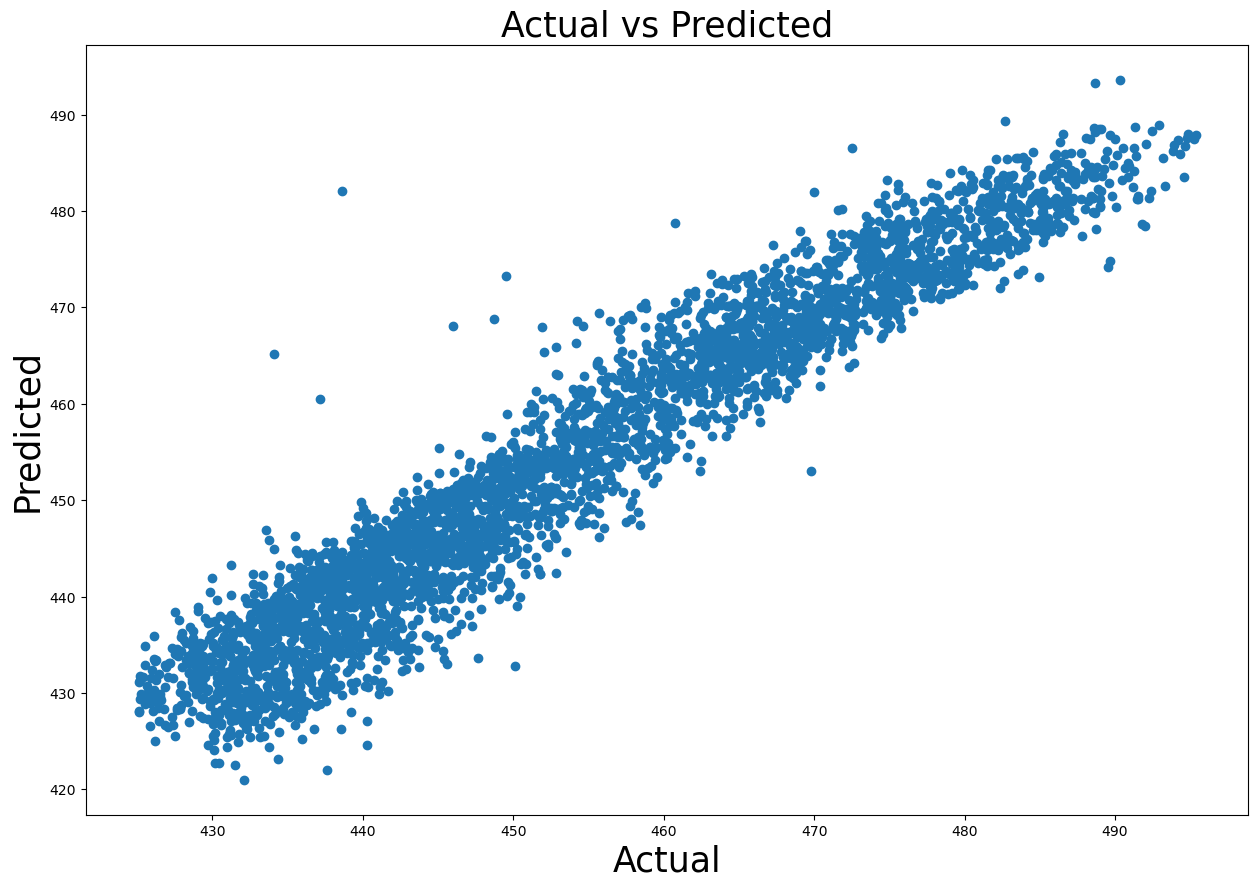

In [28]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual',fontsize=25)
plt.ylabel('Predicted',fontsize=25)
plt.title('Actual vs Predicted',fontsize=25)

# Predicted Values

In [29]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
0,426.18,433.338695,-7.158695
1,451.10,448.381768,2.718232
2,442.87,445.984692,-3.114692
3,443.70,445.996297,-2.296297
4,460.59,462.790519,-2.200519
5,438.00,440.747496,-2.747496
6,484.31,482.644747,1.665253
7,464.18,462.268978,1.911022
8,452.53,451.340223,1.189777
9,445.54,445.521421,0.018579


## Plotting the best fit line 

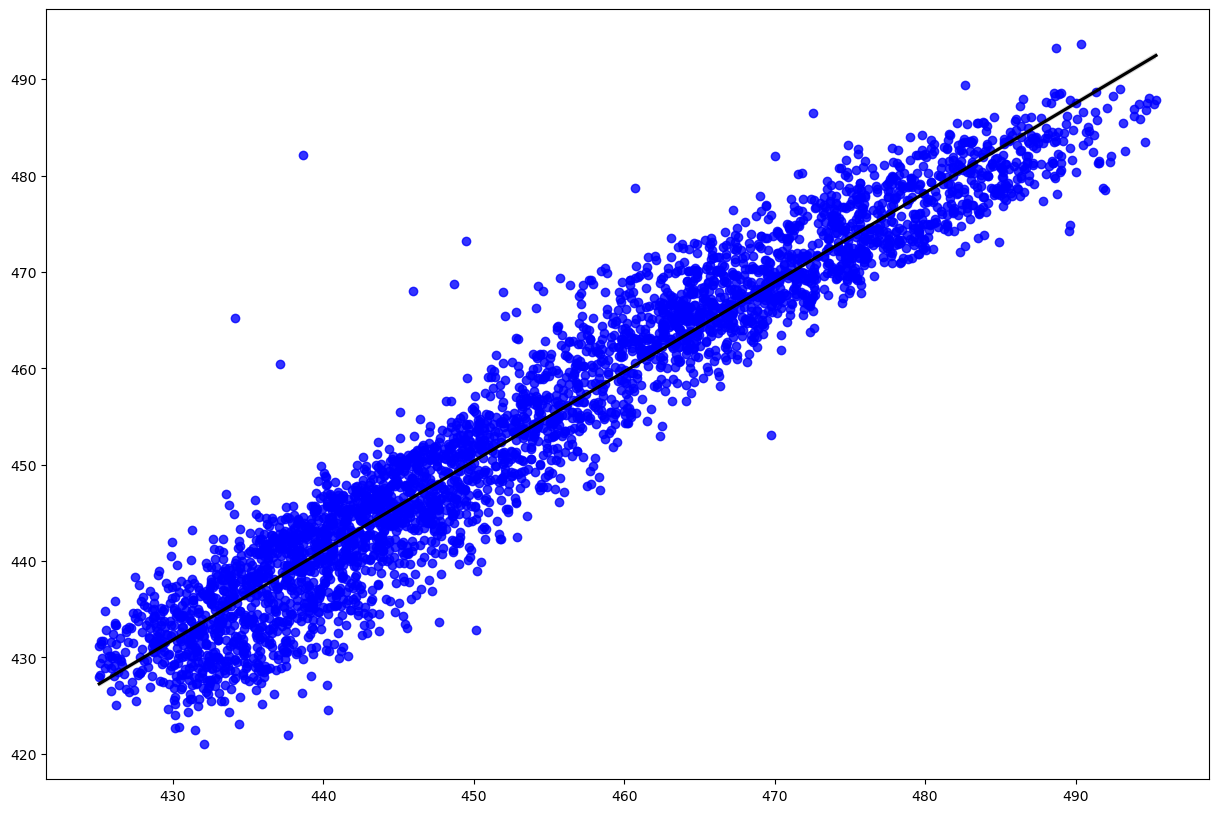

In [30]:
plt.figure(figsize=(15,10))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color":"blue"}, line_kws={"color":"black"})
plt.show()

## Extras

In [31]:
from sklearn.metrics import mean_squared_error
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 20.69
Variance score: 0.93
